# Jazz musician network

In [1]:
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import tree
import pandas as pd
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt


In [2]:
jazz = nx.read_gml( 'jazz.gml', label = None)
jazz.add_weighted_edges_from([(u,v,2) for u,v in jazz.edges])

In [3]:
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow',
    6 : 'red'
}

In [4]:
#function to plot posicions
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=True,
                        gravity=9.0,

                        # Log
                        verbose=True)

100%|██████████| 2000/2000 [00:02<00:00, 743.52it/s]


BarnesHut Approximation  took  0.85  seconds
Repulsion forces  took  1.38  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.12  seconds
AdjustSpeedAndApplyForces step  took  0.16  seconds


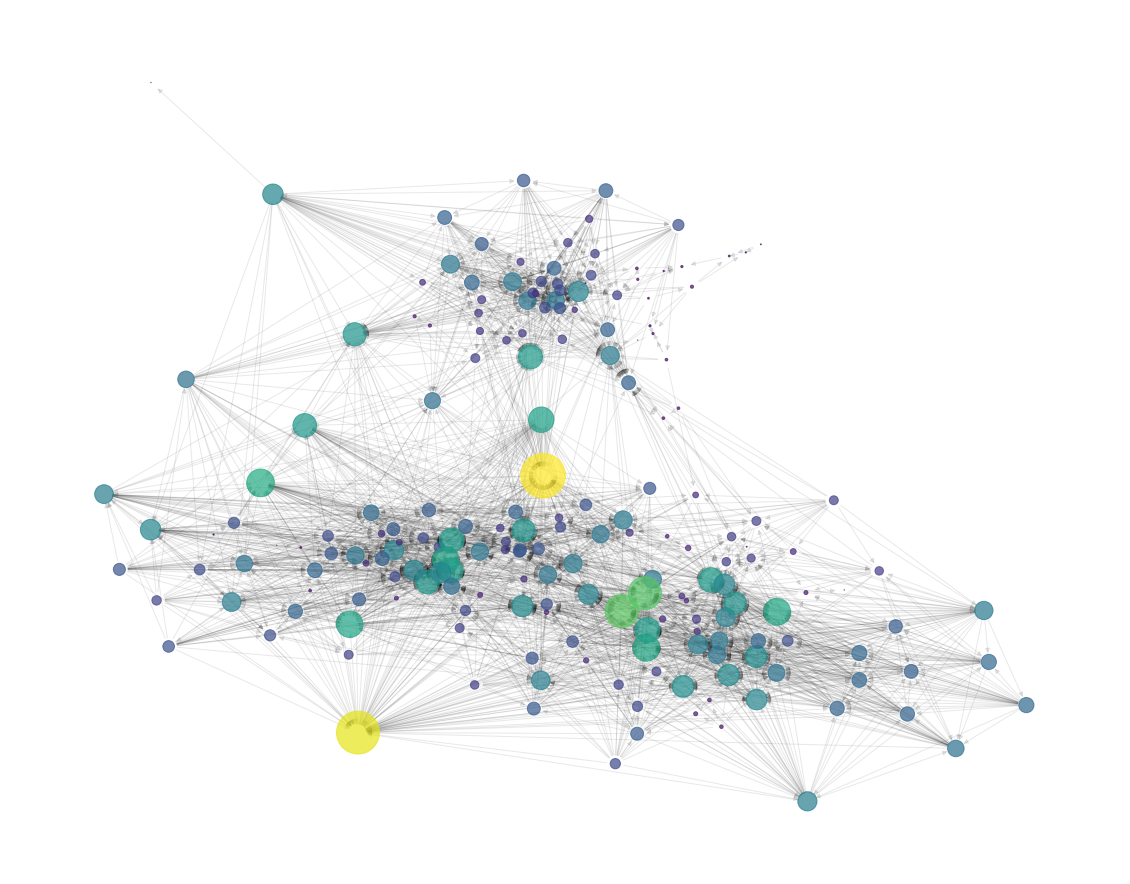

In [5]:

degree = dict(jazz.degree)
plt.figure(figsize=(20,16))

size_node =  [(v ** 2)/5 for v in degree.values()]
color_node =  [v for v in degree.values()]

positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()





*number of nodes*  198 

*number of edges* 2742

100%|██████████| 2000/2000 [00:02<00:00, 848.80it/s] 


BarnesHut Approximation  took  0.84  seconds
Repulsion forces  took  1.15  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.10  seconds
AdjustSpeedAndApplyForces step  took  0.13  seconds


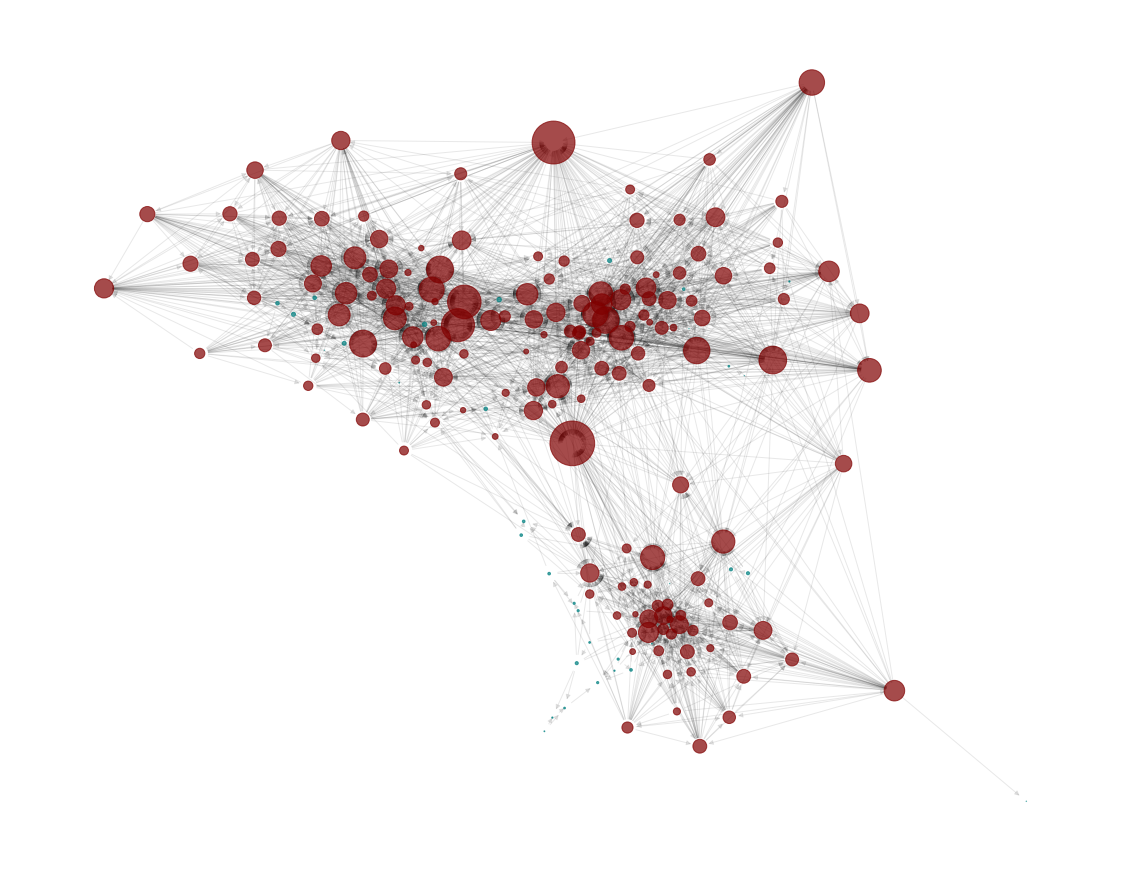

In [6]:

degree = dict(jazz.degree)
plt.figure(figsize=(20,16))


size_node =  [(v ** 2)/5 for v in degree.values()]
color_node =  [cmap[0] if v > 10 else cmap[1] for v in degree.values()]



positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()


> general plot

> coloring by counities modularidad

> readous

> perimetter

> strongly connnected

> density

> Comunities
>> by greede
>> by 

> most important graph
> 

degree incide and oposite

## *Community*
> girvan_newman
> 
> greedy_modularity_communities
> 
> cliques

 Comunyties is by **girvan_newman algorithm**
 
The Girvan-Newman algorithm for the detection and analysis of community structure relies on the iterative elimination of edges that have the highest number of shortest paths between nodes passing through them. By removing edges from the graph one-by-one, the network breaks down into smaller pieces, so-called communities. The algorithm was introduced by Michelle Girvan and Mark Newman
### How does it work?
The idea was to find which edges in a network occur most frequently between other pairs of nodes by finding edges betweenness centrality. The edges joining communities are then expected to have a high edge betweenness. The underlying community structure of the network will be much more fine-grained once the edges with the highest betweenness are eliminated which means that communities will be much easier to spot.

The Girvan-Newman algorithm can be divided into four main steps:

- For every edge in a graph, calculate the edge betweenness centrality.
- Remove the edge with the highest betweenness centrality.
- Calculate the betweenness centrality for every remaining edge.
- Repeat steps 2-4 until there are no more edges left.

In [7]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(jazz)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
jazz_communities =sorted(map(sorted, next_level_communities))


> number of comunities = 3

100%|██████████| 2000/2000 [00:02<00:00, 766.67it/s]


BarnesHut Approximation  took  0.81  seconds
Repulsion forces  took  1.33  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.13  seconds
AdjustSpeedAndApplyForces step  took  0.16  seconds


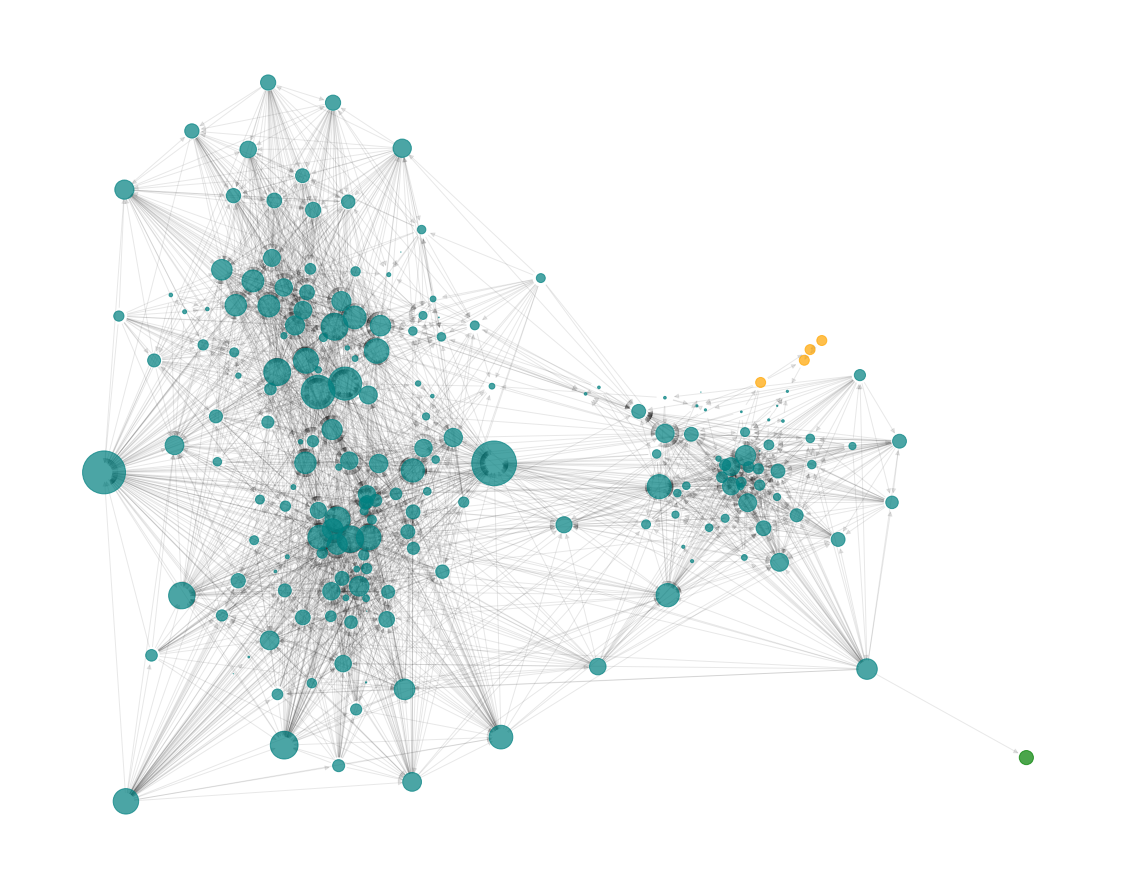

In [8]:
#cominities by .girvan_newman
plt.figure(figsize=(20,16))

degree = dict(jazz.degree)

size_node = [ degree[v]**2/5 if v in jazz_communities[0] else 100 if v in jazz_communities[1] else 200 for v in jazz]

color_node =  [cmap[1] if v in jazz_communities[0] else cmap[3] if v in jazz_communities[1] else cmap[4] for v in jazz]


positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()

 comunity based in *greedy_modularity_communities*

Find communities in G using greedy modularity maximization.

This function uses Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no futher increase in modularity is possible (a maximum). Two keyword arguments adjust the stopping condition. cutoff is a lower limit on the number of communities so you can stop the process before reaching a maximum (used to save computation time). best_n is an upper limit on the number of communities so you can make the process continue until at most n communities remain even if the maximum modularity occurs for more. To obtain exactly n communities, set both cutoff and best_n to n.

This function maximizes the generalized modularity, where resolution is the resolution parameter, often expressed as . See modularity().

In [30]:
from networkx.algorithms.community import greedy_modularity_communities
greedy_comunities = greedy_modularity_communities(jazz)

> number of comunities: 3

100%|██████████| 2000/2000 [00:02<00:00, 800.71it/s]


BarnesHut Approximation  took  0.78  seconds
Repulsion forces  took  1.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.13  seconds
AdjustSpeedAndApplyForces step  took  0.15  seconds


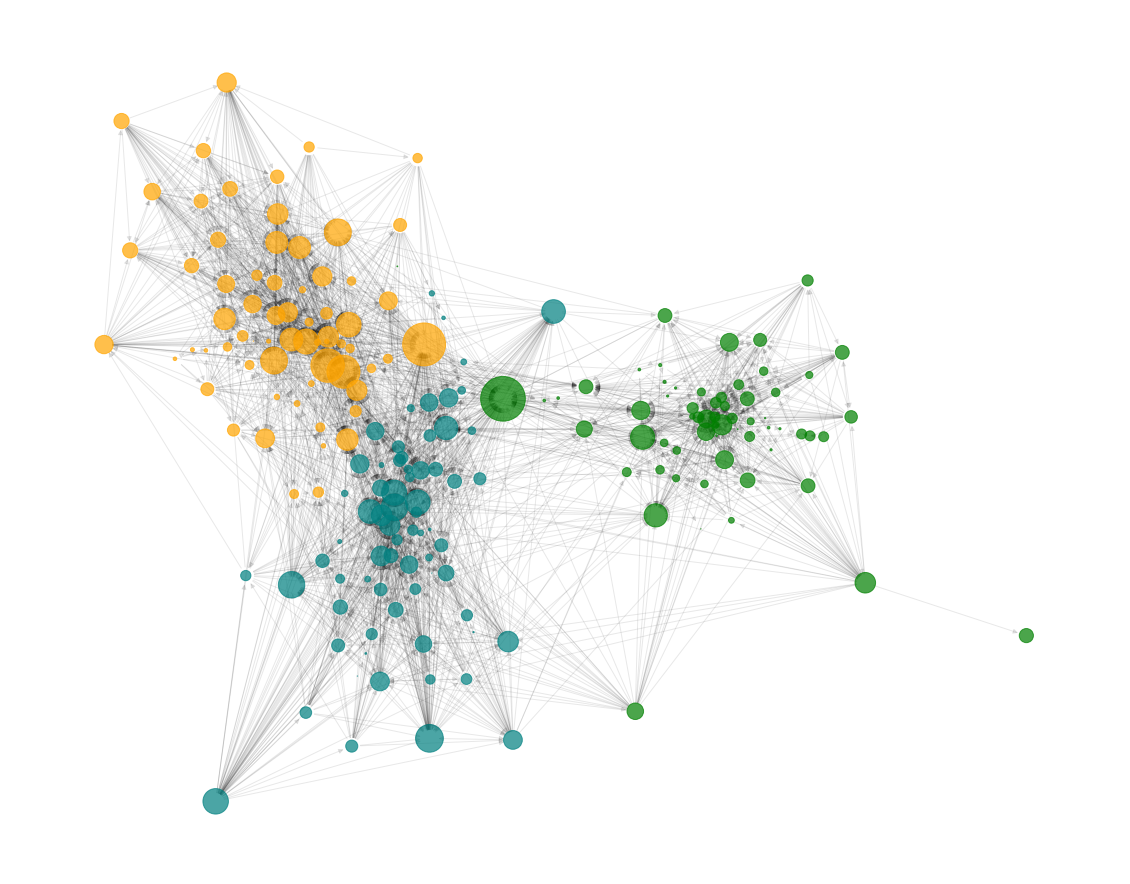

In [31]:
plt.figure(figsize=(20,16))

degree = dict(jazz.degree)

size_node = [ degree[v]**2/5 if v in jazz_communities[0] else 100 if v in jazz_communities[1] else 200 for v in jazz]

color_node =  [cmap[1] if v in greedy_comunities[0] else cmap[3] if v in greedy_comunities[1] else cmap[4] for v in jazz]


positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()

                                after this step jazz graph trasnform to unidrected graph

**CLIQUES**

Finding the largest clique in a graph is NP-complete problem, so most of these algorithms have an exponential running time

A clique of a graph G is a set X of vertices of G with the property that every pair of distinct vertices in X are adjacent in G. A maximal clique of a graph G is a clique X of vertices of G, such that there is no clique Y of vertices of G that contains all of X and at least one other vertex.

Given a graph G, its clique graph K(G) is a graph such that

- every vertex of K(G) represents a maximal clique of G; and
- two vertices of K(G) are adjacent when the underlying cliques in G share at least one vertex in common.
The clique graph K(G) can also be characterized as the intersection graph of the maximal cliques of G

In [32]:
#trasform to indirect graph
jazz_indirect = jazz.to_undirected()
cliques = Cliques(jazz_indirect)

100%|██████████| 2000/2000 [00:03<00:00, 586.12it/s]


BarnesHut Approximation  took  1.06  seconds
Repulsion forces  took  1.68  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.21  seconds


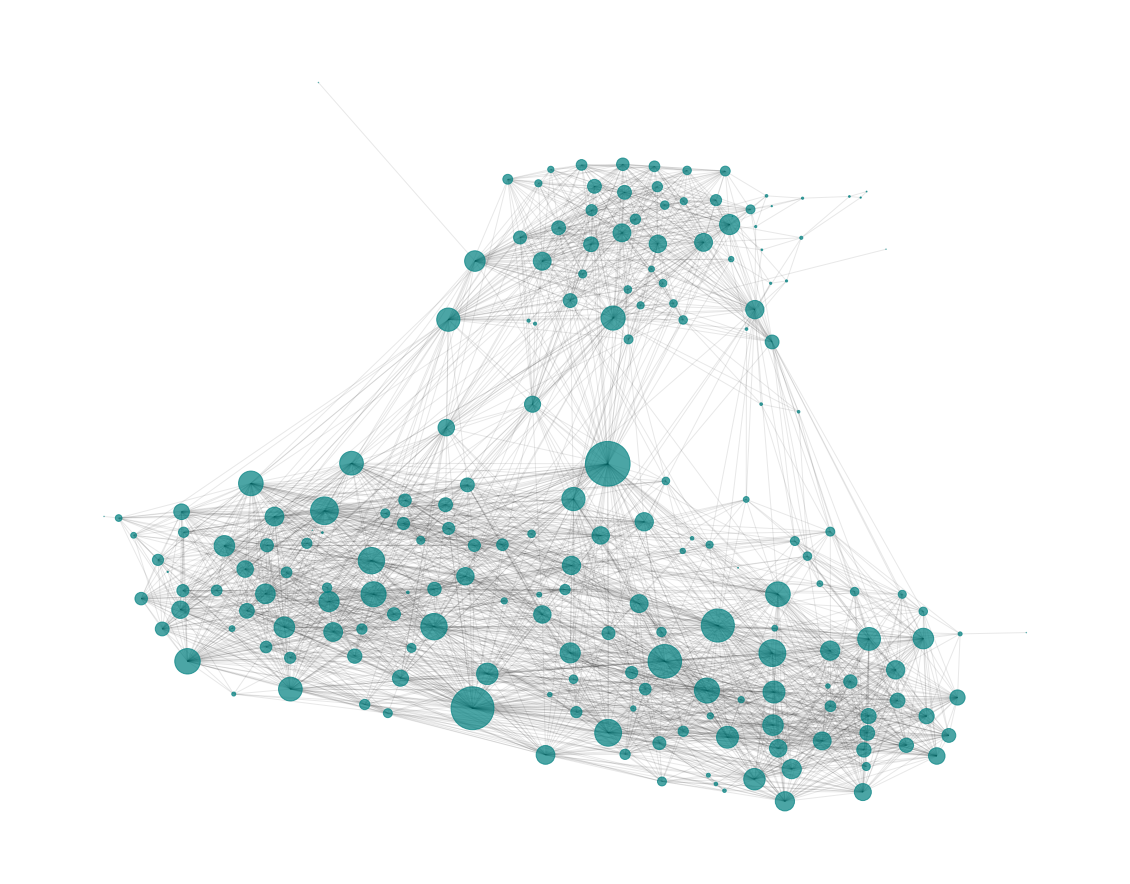

In [34]:

plt.figure(figsize=(20,16))

degree = dict(jazz_indirect.degree)

size_node = [ degree[v]**2/5  for v in jazz_indirect.nodes ]

#color_node =  [cmap[2] if v in cliques[1] else cmap[3] if v in jazz_communities[1] else cmap[4] for v in jazz_indirect.nodes]


positions = forceatlas2.forceatlas2_networkx_layout(jazz_indirect, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz_indirect, positions, node_size=size_node, node_color='teal', alpha=0.7)
nx.draw_networkx_edges(jazz_indirect, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()

> plot of undiredcted graph

In [37]:
cliques_jazz = list(nx.find_cliques(jazz_indirect))
len(cliques_jazz)


746

100%|██████████| 2000/2000 [00:02<00:00, 789.97it/s] 


BarnesHut Approximation  took  0.77  seconds
Repulsion forces  took  1.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.13  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


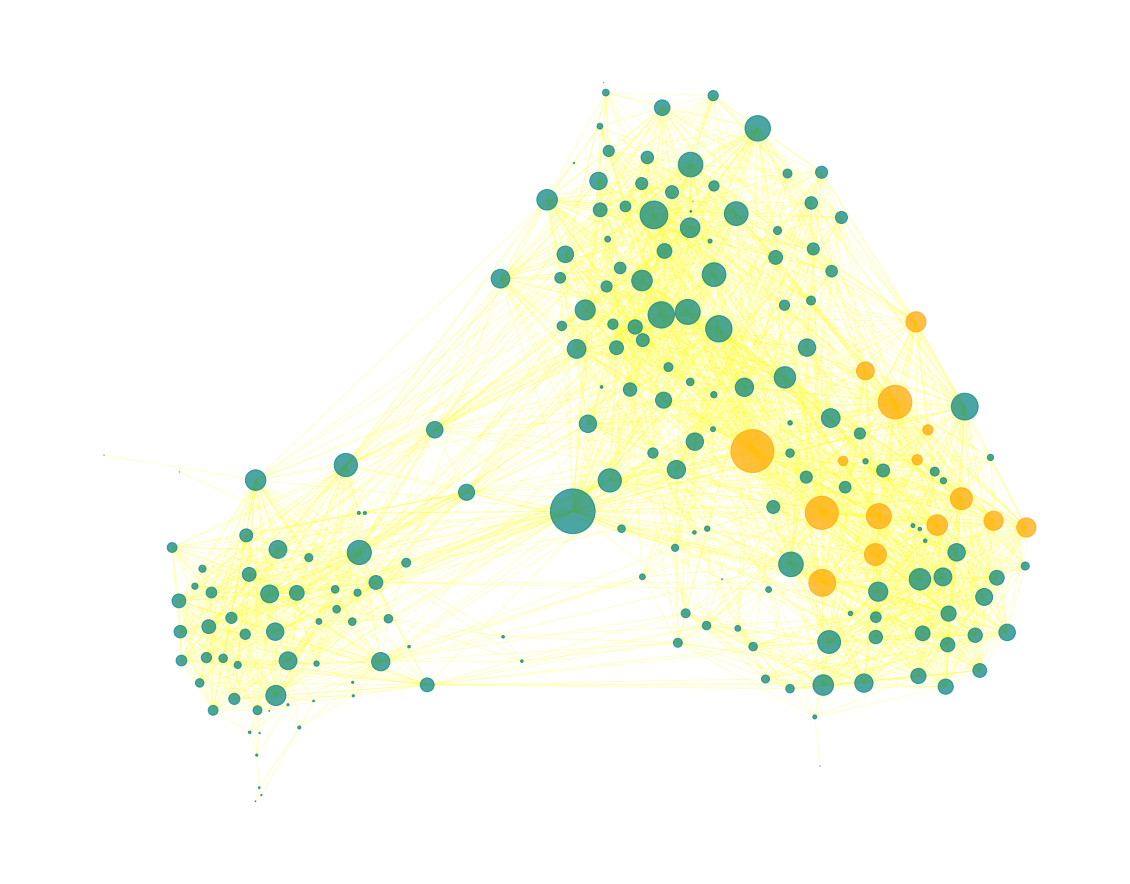

In [42]:
#superposition of max cliuqe into graph
#indirect graph
plt.figure(figsize=(20,16))

degree = dict(jazz_indirect.degree)
cliques_jazz = list(nx.find_cliques(jazz_indirect))


size_node = [ 400 if v in cliques[6] else degree[v]**2/5  for v in jazz_indirect.nodes ]

color_node = [cmap[3] if v in cliques_jazz[6] else cmap[1]  for v in jazz_indirect.nodes]

edge_color =  [cmap[3] if u in cliques[6] and v in cliques[6] else cmap[5] for (u,v) in jazz_indirect.edges]

positions = forceatlas2.forceatlas2_networkx_layout(jazz_indirect, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz_indirect, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz_indirect, positions, edge_color=edge_color, alpha=0.2)
plt.axis('off')
plt.show()

yellow nodes are all nodes wich are a clique chosing randomly from set of all cliques
> number of cliques in jazz network: 746

In [18]:
#superposition of max cliuqe into graph
#indirect graph


degree = dict(jazz_indirect.degree)
cliques_jazz = list(nx.find_cliques(jazz_indirect))

max_clique =[]
for i in cliques_jazz:
    if len(max_clique) < len(i):
        max_clique = i




100%|██████████| 2000/2000 [00:02<00:00, 924.42it/s] 


BarnesHut Approximation  took  0.70  seconds
Repulsion forces  took  1.04  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.13  seconds
AdjustSpeedAndApplyForces step  took  0.15  seconds


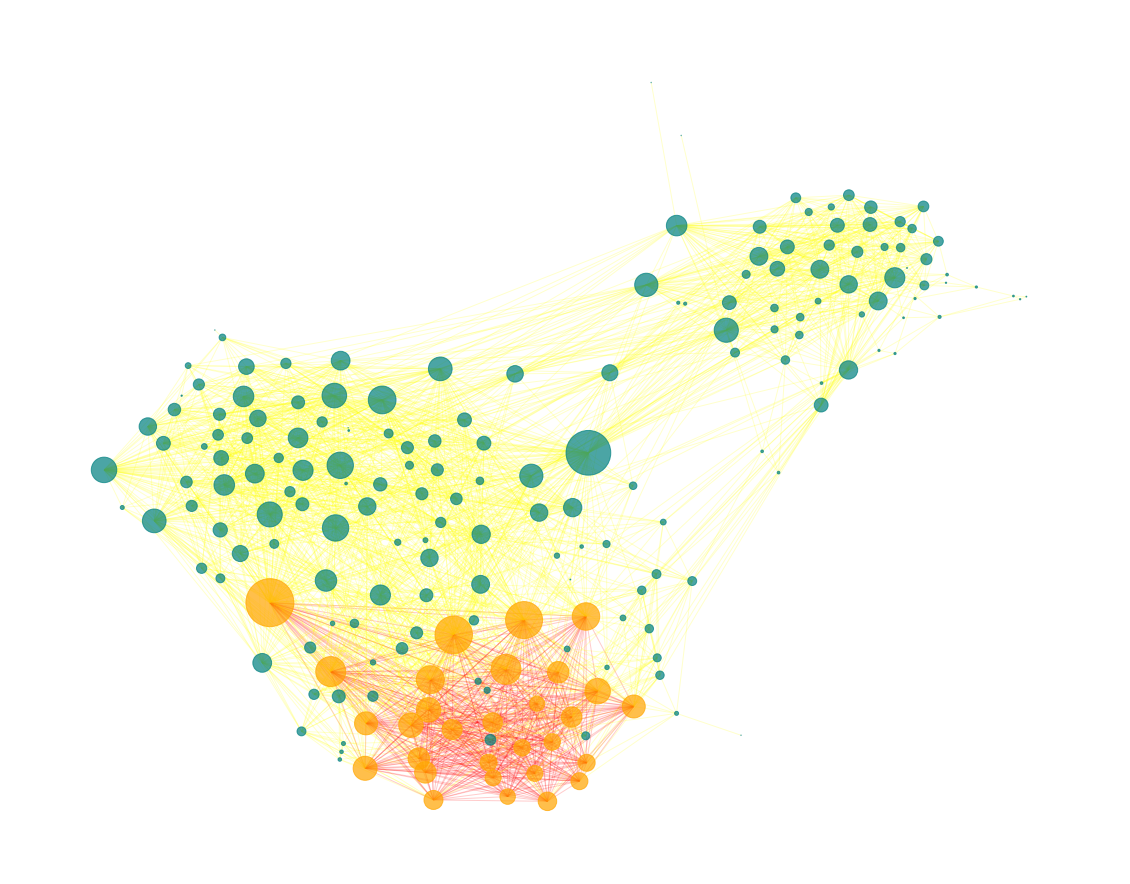

In [19]:
plt.figure(figsize=(20,16))

size_node = [ degree[v]**2/4 if v in max_clique else degree[v]**2/5  for v in jazz_indirect.nodes ]

color_node = [cmap[3] if v in max_clique else cmap[1]  for v in jazz_indirect.nodes]

edge_color =  [cmap[6] if u in max_clique and v in max_clique else cmap[5] for (u,v) in jazz_indirect.edges]

positions = forceatlas2.forceatlas2_networkx_layout(jazz_indirect, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz_indirect, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz_indirect, positions, edge_color=edge_color, alpha=0.2)
plt.axis('off')
plt.show()

# Centrality

In [20]:
[(u,v,1) for u,v in jazz.edges]

[(1, 8, 1),
 (1, 24, 1),
 (1, 35, 1),
 (1, 42, 1),
 (1, 46, 1),
 (1, 60, 1),
 (1, 74, 1),
 (1, 78, 1),
 (1, 81, 1),
 (1, 95, 1),
 (1, 98, 1),
 (1, 99, 1),
 (1, 100, 1),
 (1, 101, 1),
 (1, 103, 1),
 (1, 104, 1),
 (1, 108, 1),
 (1, 131, 1),
 (1, 132, 1),
 (1, 154, 1),
 (1, 159, 1),
 (1, 168, 1),
 (1, 171, 1),
 (2, 14, 1),
 (2, 54, 1),
 (2, 150, 1),
 (3, 115, 1),
 (3, 153, 1),
 (3, 167, 1),
 (3, 172, 1),
 (4, 5, 1),
 (4, 13, 1),
 (4, 26, 1),
 (4, 77, 1),
 (4, 85, 1),
 (4, 102, 1),
 (4, 138, 1),
 (4, 147, 1),
 (4, 153, 1),
 (4, 156, 1),
 (4, 167, 1),
 (4, 169, 1),
 (4, 172, 1),
 (4, 173, 1),
 (4, 176, 1),
 (4, 189, 1),
 (5, 13, 1),
 (5, 19, 1),
 (5, 21, 1),
 (5, 26, 1),
 (5, 27, 1),
 (5, 28, 1),
 (5, 29, 1),
 (5, 51, 1),
 (5, 53, 1),
 (5, 54, 1),
 (5, 57, 1),
 (5, 73, 1),
 (5, 75, 1),
 (5, 76, 1),
 (5, 77, 1),
 (5, 79, 1),
 (5, 85, 1),
 (5, 86, 1),
 (5, 90, 1),
 (5, 96, 1),
 (5, 97, 1),
 (5, 102, 1),
 (5, 124, 1),
 (5, 126, 1),
 (5, 128, 1),
 (5, 136, 1),
 (5, 138, 1),
 (5, 140, 1),
 (5, 1

In [21]:
jazz.add_weighted_edges_from([(u,v,2) for u,v in jazz.edges])

## Partitions via centrality measures

In [22]:
from networkx.algorithms.community.centrality import girvan_newman

G = nx.path_graph(10)
comp = girvan_newman(G)
tuple(sorted(c) for c in next(comp))

([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])

> number of comunities: 2

100%|██████████| 2000/2000 [00:02<00:00, 769.79it/s]


BarnesHut Approximation  took  0.77  seconds
Repulsion forces  took  1.36  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


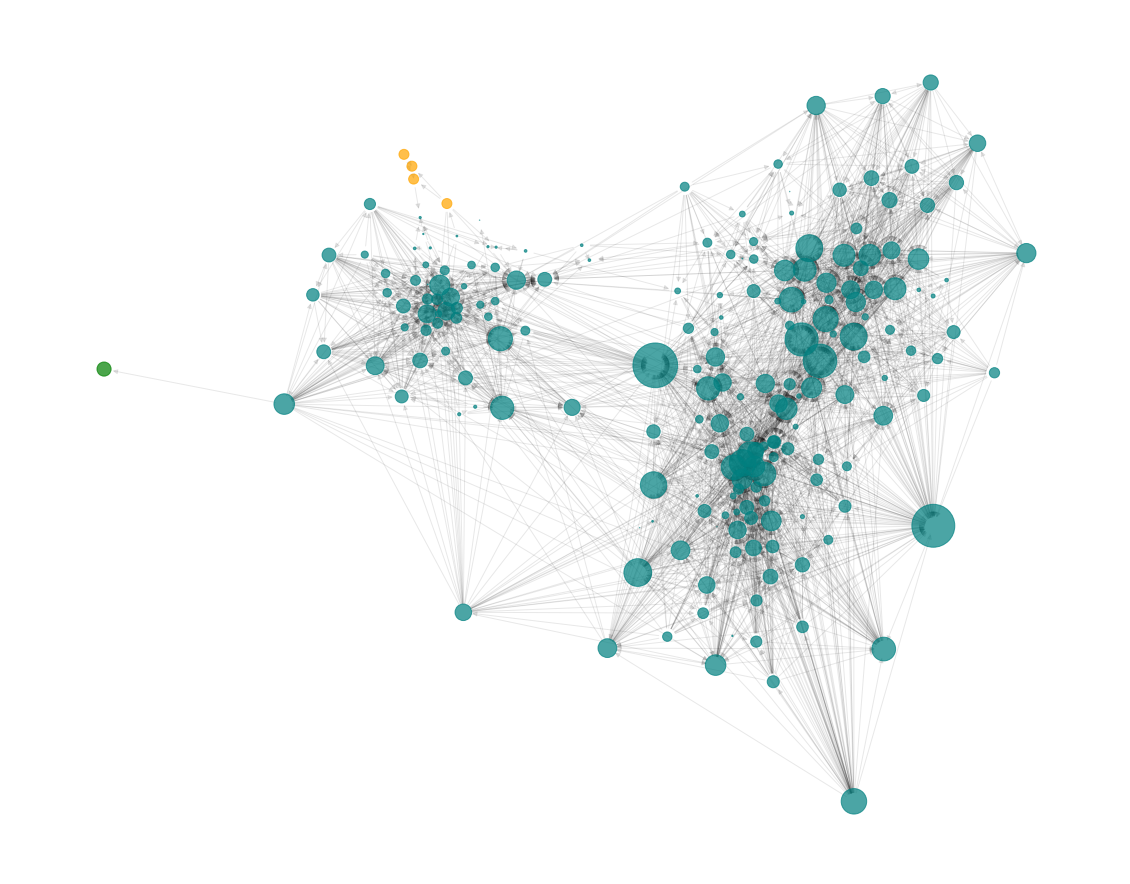

In [23]:
plt.figure(figsize=(20,16))

degree = dict(jazz.degree)

size_node = [ degree[v]**2/5 if v in jazz_communities[0] else 100 if v in jazz_communities[1] else 200 for v in jazz]

color_node =  [cmap[1] if v in jazz_communities[0] else cmap[3] if v in jazz_communities[1] else cmap[4] for v in jazz]


positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()